In [44]:
# %matplotlib inline 
# inline plot만 하면 된다. 

%matplotlib ipympl
# %matplotlib widget

In [45]:
from __future__ import (absolute_import, division, print_function, unicode_literals)

import datetime
import os.path 
import sys

import pickle
import pandas as pd

import backtrader as bt

## Setting the cash

In [46]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.broker.setcash(1000000000.0) # Set custom start cash - 10억
    print('Starting portfolio value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.run() 
    print('Final portfolio value: %.2f' % cerebro.broker.getvalue()) 

Starting portfolio value: 1000000000.00
Final portfolio value: 1000000000.00


## Import data

In [47]:
kodex200_ts_d_df = pd.read_pickle('./data_files/kodex200_ts_d_df.pkl') # daily
kodex200_ts_d_df.head()

,open,high,low,close,volume
date,,,,,
2020-01-30,29695,29765,29250,29260,3858197
2020-01-29,29764,29889,29585,29735,2968338
2020-01-28,29849,30004,29485,29635,8162182
2020-01-23,30768,30808,30538,30563,5616217
2020-01-22,30498,30997,30483,30967,6071067


In [48]:
kodex200_ts_m_df = pd.read_pickle('./data_files/kodex200_ts_m_df.pkl') # minute
kodex200_ts_m_df.head()

,open,high,low,close,volume
datetime,,,,,
2020-01-30 13:58:00,29270,29270,29260,29270,1706
2020-01-30 13:57:00,29275,29275,29260,29260,9240
2020-01-30 13:56:00,29280,29285,29265,29270,8952
2020-01-30 13:55:00,29285,29290,29280,29280,2566
2020-01-30 13:54:00,29285,29295,29285,29290,3681


In [100]:
class CustomPandasData(bt.feeds.pandafeed.PandasData):
    params = (
        ('datetime', None), 
        
        ('open', -1), # -1은 auto. Manually 1, 2, 3, 4, 5 로도 가능. 
        ('high', -1), 
        ('low', -1),
        ('close', -1), 
        ('volume', -1),
    )
    
    datafields = [
        'datetime', 
        'open', 
        'high', 
        'low', 
        'close', 
        'volume',
    ]

위의 CustomPandasData class 없이도 잘 된다. 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_derive', '_get', '_getdefaults', '_getitems', '_getkeys', '_getkwargs', '_getkwargsdefault', '_getpairs', '_getpairsbase', '_getrecurse', '_gettuple', '_getvalues', 'calendar', 'close', 'compression', 'dataname', 'datetime', 'filters', 'fromdate', 'high', 'isdefault', 'low', 'name', 'nocase', 'notdefault', 'open', 'openinterest', 'qcheck', 'sessionend', 'sessionstart', 'timeframe', 'todate', 'tz', 'tzinput', 'volume']
-----
['datetime', 'open', 'high', 'low', 'close', 'volume']


<IPython.core.display.Javascript object>


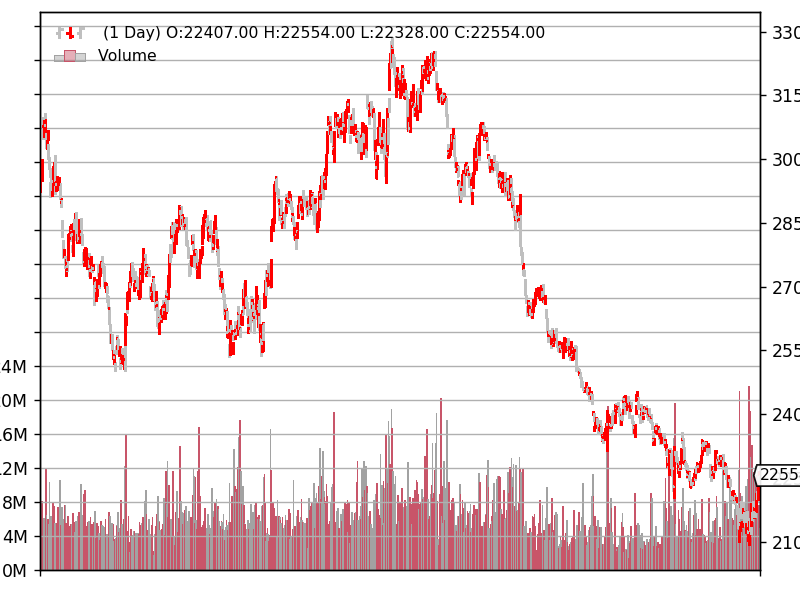

In [101]:
def runstrat():

    # Create a cerebro entity
    cerebro = bt.Cerebro(stdstats=False)

    # Add a strategy
    cerebro.addstrategy(bt.Strategy)

    dataframe = kodex200_ts_d_df

    # Pass it to the backtrader datafeed and add it to the cerebro
#     data = bt.feeds.PandasData(dataname=dataframe)
    data = CustomPandasData(dataname=dataframe)
    print(data.params)
    print(dir(data.params))
    print('-----')
    print(data.datafields)

    cerebro.adddata(data)

    # Run over everything
    cerebro.run()

    # Plot the result
    cerebro.plot(style='bar')


if __name__ == '__main__':
    runstrat()